## Health care - stroke Analysis

 <div class="alert alert-block alert-warning">

A stroke is a serious medical condition which occurs when the blood vessel carrying oxygen and nutrients to the
brain is blocked or bursts.
It can cause lasting brain damage ,long-term disability or even death.


There are various factors which can lead a person to suffer stroke like smoking, stress, heart disease
and body mass index.Some question we want to ask are:
    
.Can the rate of getting stroke depends on age?
    
.Whether smoking can increase the rate of Stroke?

 </div>

**importing libraries**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style


%matplotlib inline

 **Data Source**
 <div class="alert alert-block alert-warning">



The following dataset is from kaggle site.This comma seperated value file consist of person with stroke at different age groups.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases,life style and smoking status. Each row in the data provides relavant information about the patient.

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

The original source of the data set was not mentioned in the kaggle and is refered as confidential . It should only be used for educational purposes.
 </div>

**Data preprocessing**

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


 Definition of the column details

>There are 5109 rows and 11 columns in this dataset and the  different column details are as follows:

 <div class="alert alert-block alert-warning">
    
    
1) **id**: unique identifier\
2) **gender**: "Male", "Female" or "Other"\
3) **age**: age of the patient\
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension\
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease\
6) **ever_married**: "No" or "Yes"\
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\
8) **Residence_type**: "Rural" or "Urban"\
9) **avg_glucose_level**: average glucose level in blood\
10) **bmi**: body mass index\
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"\
12) **stroke**: **1** if the patient had a stroke or **0** if not
</div>

In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


<div class="alert alert-block alert-warning">
    
df.tail() will show the last five details in the dataset.
</div>

In [5]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3828,36431,Male,39.0,0,0,Yes,Govt_job,Rural,155.23,36.2,never smoked,0
4459,5714,Female,49.0,1,0,Yes,Govt_job,Rural,98.90,35.5,never smoked,0
2712,55607,Male,38.0,0,0,Yes,Private,Urban,101.43,27.0,formerly smoked,0
3874,51584,Male,26.0,0,0,No,Private,Urban,71.25,30.3,smokes,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0


In [5]:
df.shape

(5110, 12)

<div class="alert alert-block alert-warning">

*Dataframe .shape* will return a tuple representing the dimensionality of the Data Frame.

In this example ,the Dataframe is with 5110 rows and 12 columns
</div>

In [6]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<div class="alert alert-block alert-warning">
    
The *describe()* method computes and displays summary statistics for the dataframe there by helping to view certain basic  details like count,percentile,mean,standard deviation,min, max of each rows for analysis.
    
</div>

In [8]:
df.describe(include=np.object)

C:\Users\remya\AppData\Local\Temp\ipykernel_11240\3211851552.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


<div class="alert alert-block alert-warning">
df.describe(include=np.object) will give the details like count, unique values,frequency of occurance etc of the non numeric data are shown. Here we use numpy for finding this
    
</div>


**Data Extraction**

In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<div class="alert alert-block alert-warning">
    
The different datatypes used in this data sheet like int64,object,float64 etc can be clearly understood by using the command *DataFrame.dtypes*

 
    
Here we can see that
    
id,hypertension,heartdisease,and stroke are of integer datatype 
    
where as the columns -gender,ever married, work type,residence type,smoking status, and grouping age are of object type 

and the rest is of float64 datatypes.
</div>

In [10]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<div class="alert alert-block alert-warning">
    
**df.isnull** is used to find the missing values of each column. By using that we found  201  empty cells are there in BMI column.
</div>

<AxesSubplot:xlabel='gender', ylabel='bmi'>

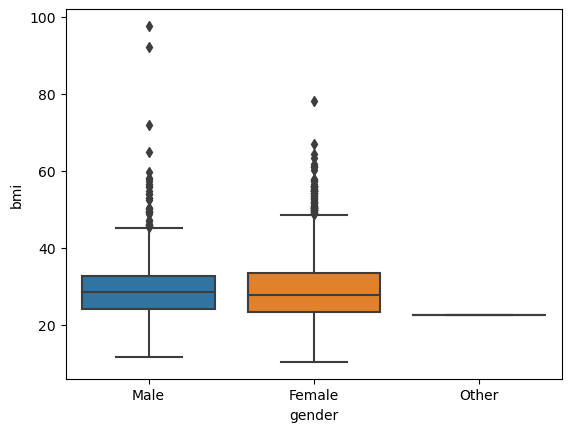

In [11]:
sns.boxplot(x=df['gender'],y=df['bmi'])

<div class="alert alert-block alert-warning">

 For determining the missing BMI values ,we need to find the mean value of BMI based on age and gender , for this we plot boxplot and a scatterplot for gender and age vs BMI .


  summary of a group of data values with features like minimum, first quartile, median, third quartile, and maximum is displayed using a box plot, for which we need to import the seaborn library. In the box plot, a box is made between the first and third quartiles, and a vertical line also appears, passing through the box at the median. The points of BMI above 50 are considered as outliers.

</div>

<AxesSubplot:xlabel='bmi', ylabel='age'>

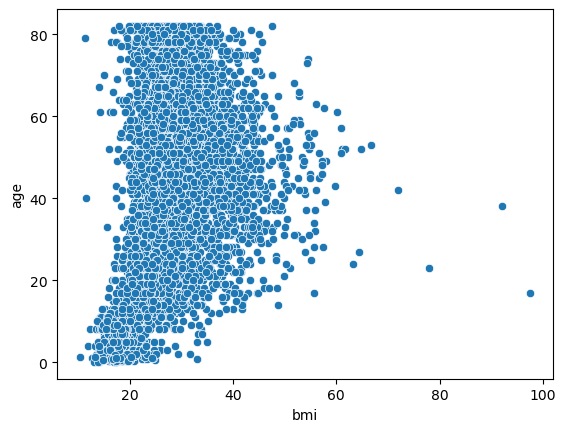

In [12]:
sns.scatterplot(data=df,x='bmi',y='age')

<div class="alert alert-block alert-warning">
    
As the next step BMI and Age are compared using scatter plot 
    

 scatter plot is a representation of data by a dot.We must import the Matplotlib library or module, which contains a function for creating scatter plots, in order to plot this. We consider values of BMI above 50 and below 10 outliers.
</div>

# Programs

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<div class="alert alert-block alert-warning">
    Imputing Values in Missing Data
    
    
fillna() will fill Column BMI  which had few NA\None values with mean values
</div>

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<div class="alert alert-block alert-warning">
Replacing null values by mean or median can be useful to calculate the values and there by make the computation more effective.
    
After replacing all null values it can been seen that no there is no more empty column in the dataframe and no more null values in BMI column.
</div>

In [16]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
df = df.drop(df[df['gender']=='Other'].index)


In [18]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

<div class="alert alert-block alert-warning">
Here we can see an unnecessary data in a gender column Other which has no impact on result so we drop this data other 
</div>

# Numpy 

In [38]:
## First we need to transform our columns to be encoded to numpy arrays
gender = df.iloc[:,1].values
ever_married = df.iloc[:,5].values  
work_type = df.iloc[:,6].values
residence_type = df.iloc[:,7].values 
smoking_status = df.iloc[:,10].values


In [40]:
# Other variables
age = df[["age"]]
hypertension = df[["hypertension"]]
heart_disease = df[["heart_disease"]]
avg_glucose_level = df[["avg_glucose_level"]]
bmi = df[["bmi"]]
stroke = df[["stroke"]]


In [31]:
unique, counts = np.unique(ever_married,return_counts = True)
print(np.array((unique, counts)).T)

[['No' 1757]
 ['Yes' 3353]]


In [32]:
unique, counts = np.unique(work_type,return_counts = True)
print(np.array((unique, counts)).T)

[['Govt_job' 657]
 ['Never_worked' 22]
 ['Private' 2925]
 ['Self-employed' 819]
 ['children' 687]]


<div class="alert alert-block alert-warning">
    
For printing the unique counts of each data in a column we used numpy and as an examples  we     
took ever married and work type columns. 

</div>

In [23]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()


LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels to numerical labels

In [24]:
gender=enc.fit_transform(df['gender'])

In [25]:
smoking_status=enc.fit_transform(df['smoking_status'])

In [26]:
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [27]:
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

<div class="alert alert-block alert-warning">
Converting the categorical to numerical data for better analysis
</div>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int32  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int32  
 6   work_type          5109 non-null   int32  
 7   Residence_type     5109 non-null   int32  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int32  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 419.1 KB


<div class="alert alert-block alert-warning">
    
Now we can see that the data types are completelty changes to numerical datatypes, that is easily used for analysis and calculations.
    
</div>

In [29]:
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)
df['bmi'] = df['bmi'].astype(int)
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 5109 non-null   int64
 1   gender             5109 non-null   int32
 2   age                5109 non-null   int32
 3   hypertension       5109 non-null   int64
 4   heart_disease      5109 non-null   int64
 5   ever_married       5109 non-null   int32
 6   work_type          5109 non-null   int32
 7   Residence_type     5109 non-null   int32
 8   avg_glucose_level  5109 non-null   int32
 9   bmi                5109 non-null   int32
 10  smoking_status     5109 non-null   int32
 11  stroke             5109 non-null   int64
dtypes: int32(8), int64(4)
memory usage: 359.2 KB


<div class="alert alert-block alert-warning">
    
Age, Avg glu level and Bmi are previously float type and by using astype(int) it changed to integer datatype and now its more convinient to analysis and calculations.
</div>


In [30]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228,36,1,1
1,51676,0,61,0,0,1,3,0,202,28,2,1
2,31112,1,80,0,1,1,2,0,105,32,2,1
3,60182,0,49,0,0,1,2,1,171,34,3,1
4,1665,0,79,1,0,1,3,0,174,24,2,1


In [31]:
df['work_type'].value_counts()

2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

# Analysing the different data

In [34]:
gender = df[df['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]
gender

[56.62650602409639, 43.373493975903614]

<div class="alert alert-block alert-warning">
    
How the gender is related to stroke?

From the given data set, 56% is Female and 43% is Male. Thus there is a probability of getting stroke more to Female than male
</div>

In [33]:
hypertension = df[df['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]
hypertension

[73.49397590361446, 26.506024096385545]

<div class="alert alert-block alert-warning">
    
Is there any relation to hypertension with stroke?

From this data set there is no specific relation between hypertension and stroke. Only 26% with hypertension gets a chance of getting stroke

</div>

In [34]:
heart_disease = df[df['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]
heart_disease

[81.12449799196787, 18.87550200803213]

<div class="alert alert-block alert-warning">
    
How can heart disease reflect the occurance of stroke?
 
As only 18% are showing affected compared to 81% which are not having heart diseases

</div>

In [42]:
ever_married = df[df['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]
ever_married

[88.35341365461848, 11.646586345381527]

<div class="alert alert-block alert-warning">
    
What will be the relation of stroke with marriage?

As we can see 88% are having a chance for stroke when compared 11% of not married
</div>

In [36]:
work_type = df[df['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[2] / sum(work_type) * 100, work_type[3] / sum(work_type) * 100,
             work_type[0] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100]
work_type

[59.83935742971887, 26.104417670682732, 13.253012048192772, 0.8032128514056224]

<div class="alert alert-block alert-warning">
    
Does the working type really influence the employees in developing stroke?

The data obtained shows that 59.8% are those who are doing private jobs,26% are self employed,13% are those doing Government Job and 
0.8% are children.

Thus we can conclude that work type does affects the health condition of employees which can lead to stroke 
</div>

In [37]:
Residence_type = df[df['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]
Residence_type 

[45.78313253012048, 54.21686746987952]

<div class="alert alert-block alert-warning">
    
What about the residence type of those who got affected by stroke?

Here we cant see a big differnce between the number .Still people of Urban Area got 54% where as rural area got 45%
</div>

In [37]:
smoking_status = df[df['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]
smoking_status 

[36.144578313253014, 28.11244979919679, 18.87550200803213, 16.867469879518072]

<div class="alert alert-block alert-warning">
    
Can smoking increase the rate of stroke?
    
Among those who got stroke , about 36% are non smokers,28% formerly smoked,16% are unknown and only 16% are 
active smokers.Hence from this data ,there is a less chance for the smokers to get stroke.
    
But as per the details given in the link the chances are more for those who are active smokers.They even says the chances are double for active smokers to get stroke .Hence it seems that the data set is not a balanced set rather consist of  random details which can be used only for educational purpose as mentioned in the site
    
https://www.quit.org.au/articles/smokesleadtostrokes/#:~:text=Smoking%20doubles%20your%20risk%20of,the%20bloodstream%20damaging%20blood%20vessels.

</div>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

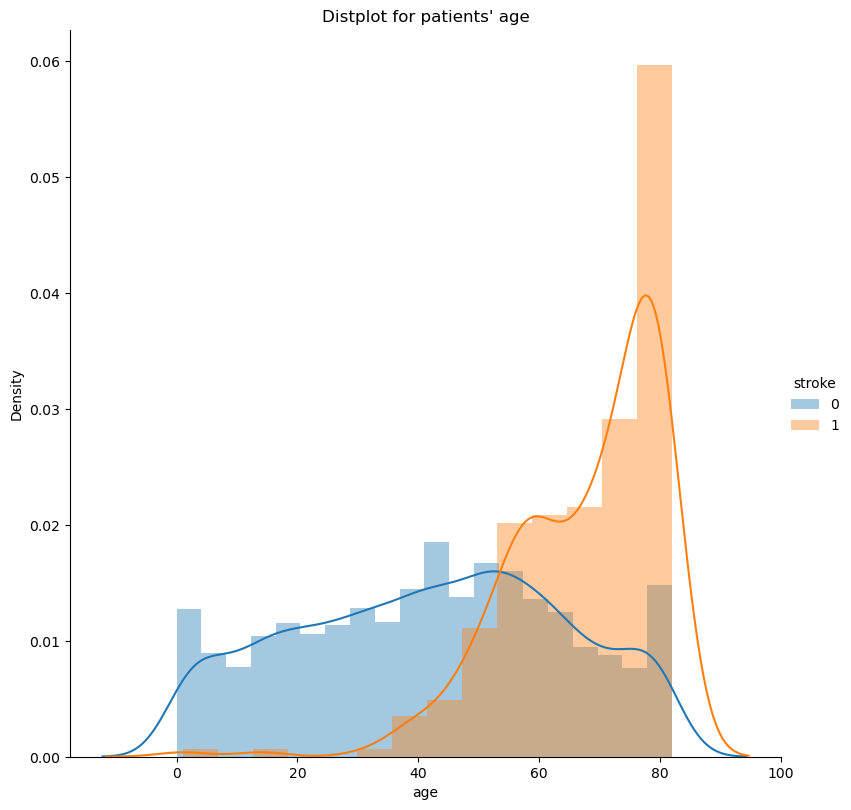

In [39]:
sns.FacetGrid(df, hue="stroke", height = 8).map(sns.distplot, "age").add_legend()
plt.title("Distplot for patients' age")
plt.show

## Results and analysis

<div class="alert alert-block alert-warning">
The findings show that women are more likely than men to experience a stroke.
Surprisingly, according to the aforementioned study, persons without any medical issues like heart disease or high blood pressure had a higher rate of stroke cases!
The likelihood of having a stroke is highest in people who have been married.

When it comes to stroke and smoking status, people who have never smoked are most at risk. The previous smokers then follow. Contrary to expectations, smokers had the lowest risk of having a stroke.
In terms of stroke cases, residents of urban residence types have surpassed those of rural residence types.
People working in the private sector have reported more than 50%+ of stroke instances when it comes to work type.
</div>

>As per the analysis we can conclude that after an age of 55, the rate of getting stroke increases by 10%